In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


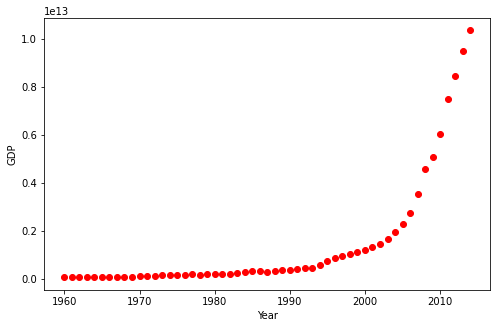

In [3]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

In [4]:
# Defining Sigmoid line and fit with the data
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

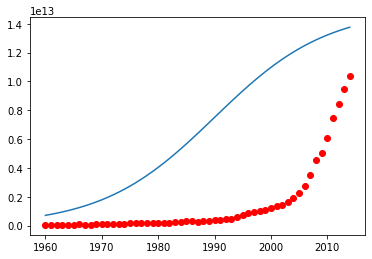

In [5]:
# Fitting data 
beta_1 = 0.10
beta_2 = 1990.0

# Logistic function
Y_pred = sigmoid(x_data, beta_1, beta_2)
# Plot initial prediction against data point
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [6]:
# Normailizing data to fit the model
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [7]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
# Print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

beta_1 = 690.453018, beta_2 = 0.997207


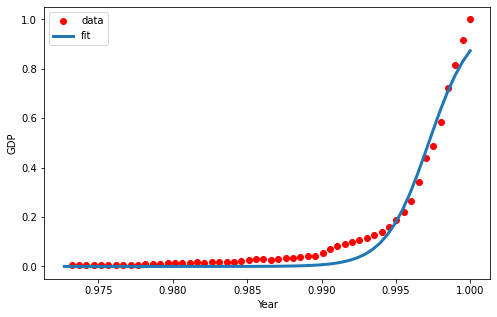

In [8]:
x = np.linspace(1960, 2015, 55)
x = x / max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, * popt)
plt.plot(xdata, ydata, 'ro', label = 'data')
plt.plot(x, y, linewidth = 3.0, label = 'fit')
plt.legend(loc = 'best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()